# Сборный проект №1. Выявление закономерностей определяющих успешность игры.  
  
**Описание проекта**
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».  
  
**Цель исследования:**   
Представлены данные до 2016 года по видеоиграм. Нужно сделать прогноз на 2017 используя представленные данные      
    
**Ход исследования:**
1) Общая информация
1) Подготовка данных    
2) Выборка данных за соответствующий актуальный период   
3) Исследование влияния на продажи внутри одной популярной платформы отзывы пользователей и критиков  
4) Изучение общего распределение игр по жанрам  
5) Составление портрета пользователя каждого региона  
6) Проверка гипотез  
    Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
    Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  

In [1]:
import pandas as pd 
import  numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats as st

## Общая информация:

In [2]:
data = pd.read_csv('/datasets/games.csv') 

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data['Critic_Score'].sample(20).values

array([59., nan, 73., nan, 69., nan, nan, nan, 70., 81., 74., nan, 72.,
       42., 76., 92., nan, nan, nan, 51.])

In [5]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Пустоты :   
1. Name  
2. Genre  
3. Year_of_Release  
4. Critic_Score  
5. User_Score  
6. Rating  

In [7]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [8]:
types = data.dtypes.to_dict() 
for i in types:
    
    if types[i] == 'object' :
        print(f'column name: {i}')
        print('  type of column: object')
        print(f'\tnumber of distinct elements : {data[i].nunique()}')
        print(f'\tsamples : {data[i].sample(8).values}')
        print(f'\tunique_names {data[i].unique()}')

        print(f'\tnul counts: {data[i].isnull().sum()}')
        print(f'\tnul counts %: {np.round(data[i].isnull().sum()/len(data[i])*100,2)}%\n\n')

column name: Name
  type of column: object
	number of distinct elements : 11559
	samples : ['Crazy Chicken: Star Karts' 'All-Star Baseball 2003'
 'Tears to Tiara: Garland of the Earth' 'Onimusha: Dawn of Dreams'
 'Chaos Rings III' 'Super Adventure Island' 'Shrek: Forever After'
 'Tropico 4']
	unique_names ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
	nul counts: 2
	nul counts %: 0.01%


column name: Platform
  type of column: object
	number of distinct elements : 31
	samples : ['Wii' 'Wii' 'PS2' 'PS3' 'PS2' 'XB' 'PSV' 'GC']
	unique_names ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
	nul counts: 0
	nul counts %: 0.0%


column name: Genre
  type of column: object
	number of distinct elements : 12
	samples : ['Simulation' 'Shooter' 'Sports' 'Action' 'Racin

User_Score и Rating имеют большое количество пустот - 6701 и 6766 соотвтественно, что является 40% от ощего числа

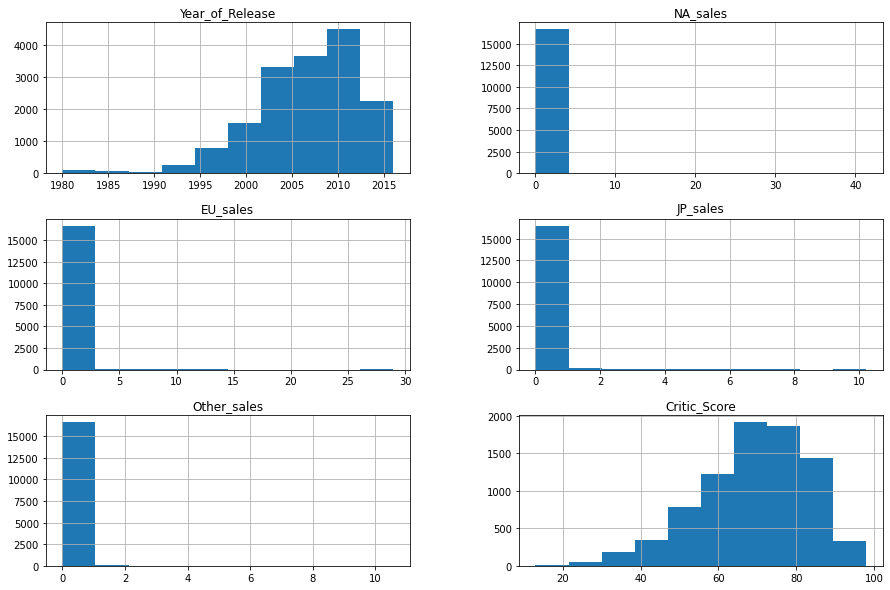

In [9]:
data.hist(figsize=(15,10))
plt.show()

### Вывод: 
Есть столбцы с количеством пропусков 40% - User_Score и Rating   
Столбцы названы не в соответствии Snake case   
Обратить внимание на 'tbd' в User_Score  
В Name и Genre - всего два пропуска    
Year_of_Release -содержит 269 пустот  

## Предобработка данных

### Исправоения регистра

In [10]:

data.columns = data.columns.str.lower()
data.columns 

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Работа с пропусками

In [11]:
data[data['name'].isna()] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


эти строки не несут никакой информативной ценности и кол-во - 2, так что можно спокойно убрать их 

Эти строки были удалены так как достаточно ранний год выпуска с малыми продажами, так же отсутсвует информация о рейтинге и оценке как пользовалями так и критиками. А восстановить жанр по году может дать ошибочное значение. Пропуск в имени скорее всего связан с технической ошибкой(например состоял из каких-то спецсимволов) а жанр мог быть как технической так и слишком редким типом.

Скорее всего большинство пропусков связано с подрузамевавшейся tbd, но утверждать что все пропуски были именно по этой причине нельзя, так как могут быть игры настолько неизвестные, что на площадке откуда были взяты данные они могли просто никем не быть оценены

In [12]:
data.dropna(subset=['name'],inplace=True) 

In [13]:
# тут работа с оценкой в которой тбд и надо бы привести к флоат

In [14]:
# подсчет тбд 
data[data['user_score']=='tbd'].count() # 

name               2424
platform           2424
year_of_release    2376
genre              2424
na_sales           2424
eu_sales           2424
jp_sales           2424
other_sales        2424
critic_score       1082
user_score         2424
rating             2374
dtype: int64

In [15]:
data[data['user_score'].isna()].count() 

name               6699
platform           6699
year_of_release    6605
genre              6699
na_sales           6699
eu_sales           6699
jp_sales           6699
other_sales        6699
critic_score         38
user_score            0
rating               71
dtype: int64

In [16]:
data[data['user_score']=='0'] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008.0,Adventure,0.66,0.0,0.0,0.06,NaN,0,E


0 значение всего одно и оно у довольно-таки известного бренда - май литл пони,  получть 0 рейтинг - это ничтожная вероятность , так как даже при массовом объеденении пользователей с притензиями к игре найдутся фанаты, которые хоть какую-то десятую часть, но отыграют 

In [17]:
data = data.drop(data[data['user_score']=='0'].index.to_list())

In [18]:
data['user_score'].replace('tbd', '0', inplace=True)


Теперь можно присвоить tbd - 0 значение , так как их больше нет в датафрейме, и нам поможет инденцифицировать их

tbd - этот рейтинг собираются определить в будущем. Посмотрим на строки с пропущенными значениями столбца year of release


In [19]:
data['user_score'] = data['user_score'].astype('float')

In [20]:
data.dropna(subset=['year_of_release'],inplace=True)

так как Nan значений в годах не так много около 1.5%, то можно их отбросить, учитывая, что никакой информации по годам мы не сможем получить а это важно для дальнейшего исследования

In [21]:
data[data['critic_score'].isna()]['name'].count() 

8460

Наличие 8460 значений NaN в данных может быть проблемой, однако в данном случае их удаление 
может привести к потере ценных данных для анализа продаж за последние годы. Поэтому, вместо удаления, планирую отфильтровать эти значения позже, на этапе анализа корреляции между оценками и продажами.

In [22]:
data['year_of_release'] = data['year_of_release'].astype('int')


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9838 non-null   float64
 10  rating           9767 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Подсчет суммарных продаж

для удобства закинем данные о суммарных продажах  рядом с остальными 

In [24]:
data.insert(8, 'summary_sales',  data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'])

In [25]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,summary_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN


### Обработка дубликатов

In [26]:
data.duplicated().sum()

0

In [27]:
duplicates = data.duplicated(subset=['name', 'platform'], keep=False)
duplicate_rows = data.loc[duplicates, :]
duplicate_rows

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,summary_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,2.56,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,1.56,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,1.25,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,0.29,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,0.08,82.0,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,0.01,83.0,5.5,E


Madden NFL 13 оба на PS3 - мое мнение что надо к европейским продажам прибавить 0.01 и удалить копию (почитал новости, ничего указывающего на этот выброс нет). Если же так не сделать, то такое маленькое значение может подпортить какую-то из выборок.  
Need for Speed: Most Wanted	на PC - тут все правильно так как в 2012 году вышла одноименная игра   
Need for Speed: Most Wanted	на X360 - тут все правильно так как в 2012 году вышла одноименная игра 

In [28]:
data.loc[604,'eu_sales'] += 0.01

In [29]:
data.loc[604,'eu_sales']

0.23

In [30]:
data.loc[604,'eu_sales']

0.23

In [31]:
data.drop(16230, inplace=True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int64  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   summary_sales    16442 non-null  float64
 9   critic_score     7982 non-null   float64
 10  user_score       9837 non-null   float64
 11  rating           9766 non-null   object 
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Явных дубликатов нет

### Вывод :   
1)Были удалены все nan в столбцах: genre, year_of_release, name  
2)В user_score tbd заменено на 0, которого в этом столбце больше нет, так как удалена еинственная строка которая его содержала, но данные не выглядили корректными  
3)Добавлен столбец с суммарными продажами  
4)Осталось 16443 строк (было 16715)  
5)приведены к snake case  названия столбцов
6)Был удален неявный дубликат и продажи которые ошибочно в него были записаны, я перезаписал  в основной экземпляр

## Исследовательский анализ данных

### Количество выпущенных игр по годам

In [33]:
#посмотрим сколько игр выпускалось за разные годы

In [34]:
data_num_by_year = data.groupby('year_of_release')['name'].count()
data_num_by_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1426
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

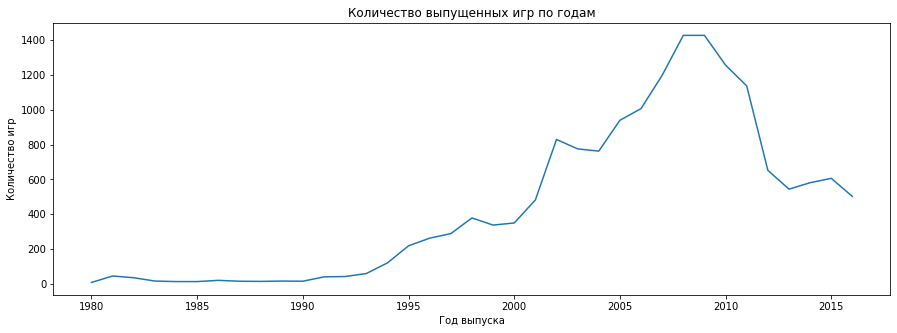

In [35]:
data_num_by_year.plot(figsize=(15,5))
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')

plt.title('Количество выпущенных игр по годам')
plt.show()

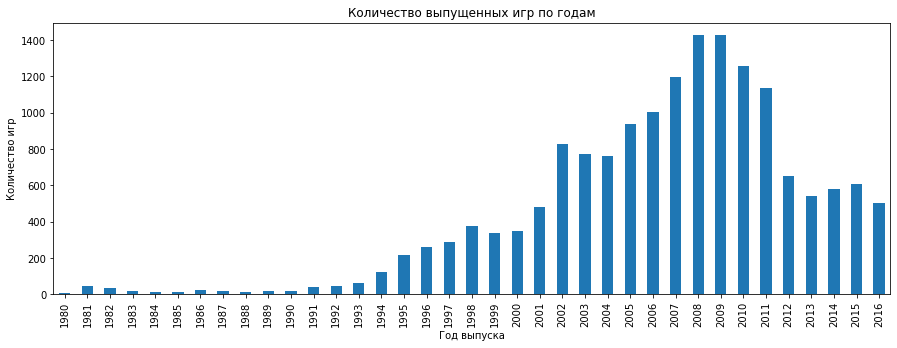

In [36]:
data_num_by_year.plot(kind='bar',figsize=(15,5))

plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')

plt.title('Количество выпущенных игр по годам')
plt.show()

В период с 1980 по 1994 год количество игр было довольно низким, но начиная с 1995 года стало расти и достигло пика в 2008-2009 году с 1426 играми, после чего пошел спад но до сих пор уровень достаточно высокий  

Рост 1994  
1. Выход новых игровых консолей: в 1994 году были выпущены две новые консоли — Sony PlayStation и Sega Saturn. Эти консоли стали очень популярными, что привело к увеличению продаж игр.  

2. Развитие компьютерных технологий: в 1994 году компьютеры стали более доступными, а игры для компьютеров стали более популярными. Это также могло повлиять на рост продаж игр.  

3. Развитие мобильной игровой индустрии: в 1994 году были выпущены первые мобильные игры, которые стали доступны на портативных консолях. Это также могло повлиять на увеличение продаж игр в 1994 году.  
  
Спад после 2009  
1. Экономический кризис: в 2008 году произошел глобальный экономический кризис, который затронул многие страны мира. Это привело к сокращению бюджетов на развлечения, в том числе на видеоигры  
2. Насыщение рынка: в 2000-х годах на рынок вышло много новых игровых консолей и игр, что привело к насыщению рынка и уменьшению интереса к играм.  
3.  Рост популярности мобильных игр: с развитием технологий и доступности смартфонов и планшетов, мобильные игры стали более популярными. Многие пользователи переключились на мобильные игры, что привело к снижению продаж игр на других платформах.  
4.  Пиратство: в 2000-х годах пиратство стало очень распространенным. Многие пользователи начали скачивать игры с торрентов и других нелегальных источников, что привело к уменьшению продаж.  

Спад после 2011
1. Переход на новое поколение консолей: в 2013 году были выпущены новые игровые консоли Xbox One и PlayStation 4. Это привело к тому, что многие пользователи отложили покупку новых игр до выхода новых консолей.

2. Ориентация на мультиплеер и онлайн-игры: с развитием интернета и социальных сетей стало популярным играть в мультиплеер и онлайн-игры. Из-за этого многие игроки перестали покупать игры с одиночным режимом.

3. Рост рынка мобильных игр: мобильные игры продолжали набирать популярность, что привело к уменьшению продаж игр на других платформах.

На основе вывода можно сказать что данные до 1994 года не важны

In [37]:
data=data[data['year_of_release']>=1994]

In [38]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,summary_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,8.5,E


In [39]:
data['year_of_release'].min()

1994

In [40]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,summary_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,8.5,E


### Выбор платформ с наибольшими суммарными продажами

In [41]:
choosing_platforms = data.groupby('platform')['summary_sales'].sum()
q1 = np.percentile(choosing_platforms, 25)
q3 = np.percentile(choosing_platforms, 75)
iqr = q3-q1
iqr*1.5  + q3

770.004999999996

In [42]:
choosing_platforms

platform
3DO        0.10
3DS      257.81
DC        15.95
DS       802.04
GB       152.08
GBA      312.88
GC       196.73
GEN        8.13
N64      218.01
NES        0.11
NG         1.23
PC       252.66
PCFX       0.03
PS       727.58
PS2     1233.56
PS3      931.33
PS4      314.14
PSP      289.53
PSV       53.81
SAT       33.59
SCD        0.36
SNES      84.67
TG16       0.16
WS         1.42
Wii      891.18
WiiU      82.19
X360     961.24
XB       251.57
XOne     159.32
Name: summary_sales, dtype: float64

<AxesSubplot:>

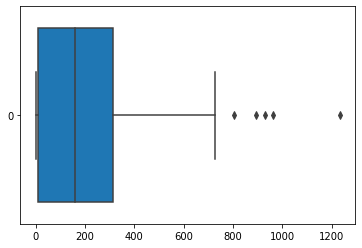

In [43]:
sns.boxplot(data=choosing_platforms, orient = 'h',saturation=1)

По графику можно определить что выбросы есть у тех компаний выручка которых превышает 770 -> их включаем в рассмотрение   
Но так же включу в рассмотрение ps - 727.58

In [44]:
choosing_platforms = choosing_platforms[choosing_platforms > 727].index.to_list()


In [45]:
choosing_platforms

['DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360']

In [46]:
data1 = data[data['platform'].isin(choosing_platforms)]
data1 = data1.groupby(['year_of_release','platform'])[['na_sales','eu_sales','jp_sales','summary_sales']].sum()
data1

na_sales  eu_sales  jp_sales  summary_sales
year_of_release platform                                             
1994            PS            1.76      1.20      2.67           6.03
1995            PS           14.61      9.85      9.54          35.96
1996            PS           45.42     25.92     17.82          94.70
1997            PS           58.06     37.14     33.10         136.17
1998            PS           83.22     48.74     28.48         169.49
...                            ...       ...       ...            ...
2015            Wii           0.43      0.62      0.00           1.14
                X360          7.36      3.50      0.00          11.96
2016            PS3           0.67      1.26      1.30           3.60
                Wii           0.06      0.11      0.00           0.18
                X360          0.69      0.71      0.00           1.52

[66 rows x 4 columns]

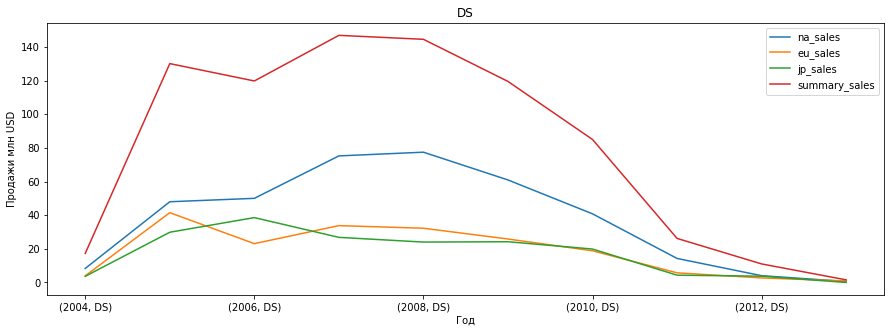

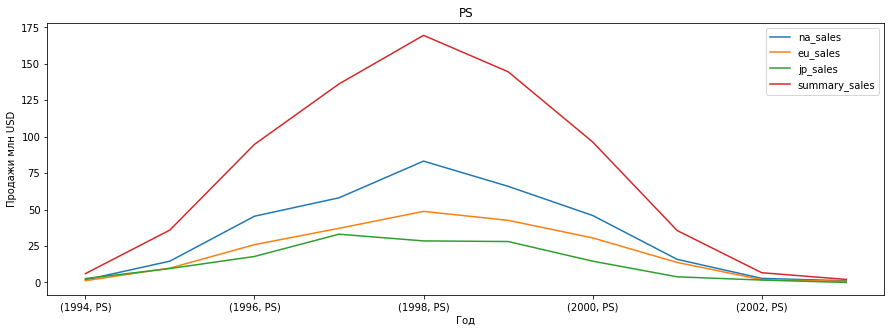

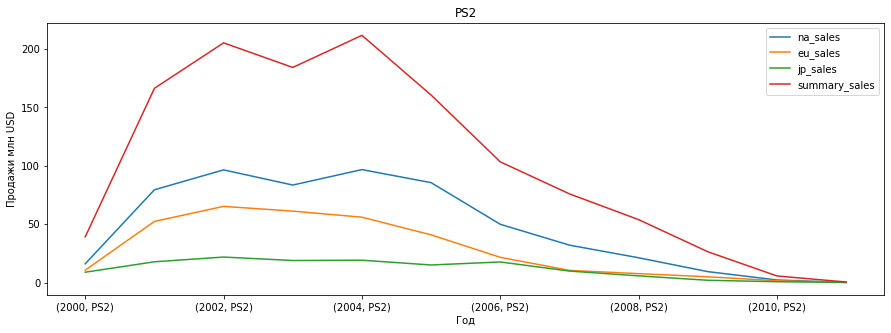

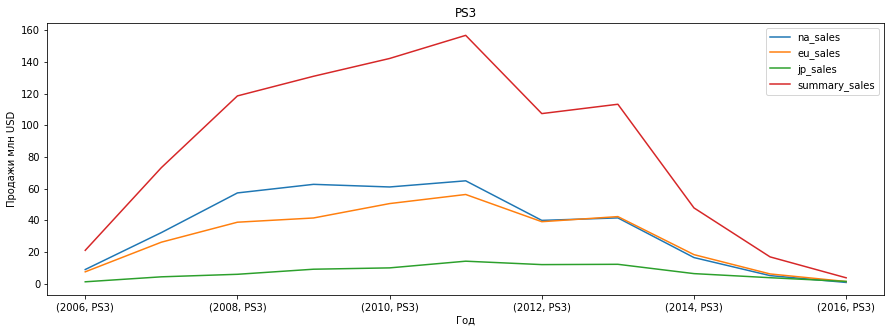

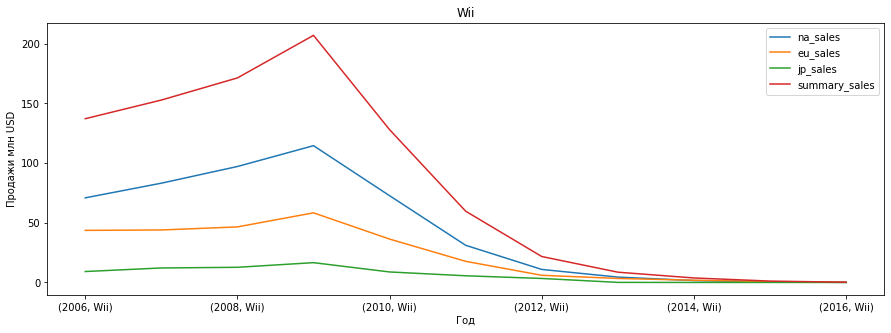

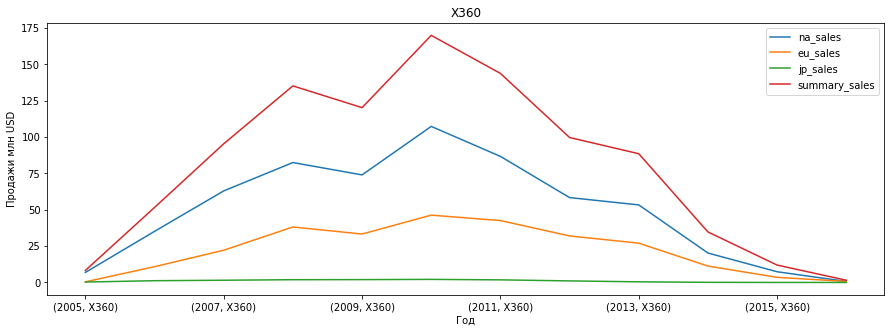

In [47]:

for i in choosing_platforms:
    data1[data1.index.map(lambda x: x[1])==i].plot(figsize=(15, 5))
    plt.title(str(i))
    plt.xlabel('Год')
    plt.ylabel('Продажи млн USD')
    plt.show()

In [48]:
data1 = data1['summary_sales'].reset_index()
data1

,year_of_release,platform,summary_sales
0,1994,PS,6.03
1,1995,PS,35.96
2,1996,PS,94.70
3,1997,PS,136.17
4,1998,PS,169.49
...,...,...,...
61,2015,Wii,1.14
62,2015,X360,11.96
63,2016,PS3,3.60
64,2016,Wii,0.18


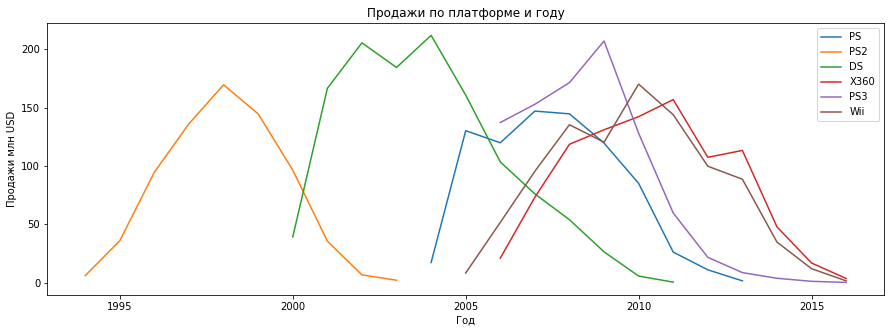

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))
data1.groupby('platform').plot(x='year_of_release', y = 'summary_sales',figsize=(15,5),ax=ax)
plt.legend(data1['platform'].unique())
plt.title('Продажи по платформе и году')
plt.xlabel('Год')
plt.ylabel('Продажи млн USD')
plt.show()


Графики показывают, что игры обычно выпускаются на одной платформе в течение 10 лет, а пиковые продажи обычно приходятся на середину этого периода. Следовательно, для наших прогнозов на 2017 год необходимо использовать актуальные данные, соответствующие текущим платформам, которые находятся в середине своего жизненного цикла.   
Из графиков видно, что платформы DS,PS2,PS последние года не выпускают игры.

Наиболее важным периодом для нас является отрезок после спада т.е. 2013-2016, с компаниями которые до сих пор продают либо в этот отрезок имели продажи

In [50]:
data.groupby(['platform','year_of_release'])['summary_sales'].sum()

platform  year_of_release
3DO       1994                0.02
          1995                0.08
3DS       2011               63.20
          2012               51.36
          2013               56.57
                             ...  
XB        2008                0.18
XOne      2013               18.96
          2014               54.07
          2015               60.14
          2016               26.15
Name: summary_sales, Length: 197, dtype: float64

In [51]:
data_pt = data[data['year_of_release']>=2013].pivot_table(
    index = 'platform', 
    columns = 'year_of_release', 
    values = 'summary_sales', 
    aggfunc = 'sum').fillna('-')

In [52]:
#платформы которые продаются в 2016
data_pt

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.57,43.76,27.78,15.14
DS,1.54,-,-,-
PC,12.38,13.28,8.52,5.25
PS3,113.25,47.76,16.82,3.6
PS4,25.99,100.0,118.9,69.25
PSP,3.14,0.24,0.12,-
PSV,10.59,11.9,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.6


In [53]:
data_pt

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.57,43.76,27.78,15.14
DS,1.54,-,-,-
PC,12.38,13.28,8.52,5.25
PS3,113.25,47.76,16.82,3.6
PS4,25.99,100.0,118.9,69.25
PSP,3.14,0.24,0.12,-
PSV,10.59,11.9,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.6


In [54]:
#можно отбросить ds 
data_pt.drop(index=['DS','PSP'],inplace = True)

In [55]:
data_pt

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.57,43.76,27.78,15.14
PC,12.38,13.28,8.52,5.25
PS3,113.25,47.76,16.82,3.6
PS4,25.99,100.0,118.9,69.25
PSV,10.59,11.9,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.6
X360,88.58,34.74,11.96,1.52
XOne,18.96,54.07,60.14,26.15


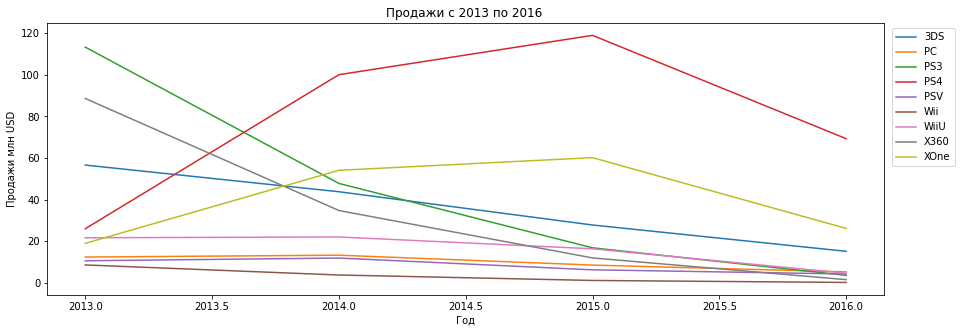

In [56]:
data_pt.T.plot(figsize = (15,5))
plt.title('Продажи с 2013 по 2016 ')
plt.xlabel('Год')
plt.ylabel('Продажи млн USD')
plt.legend(loc='upper right', bbox_to_anchor=(1.09, 1))
plt.show()

Были отобраны только те платформы, на которых были продажи в 2016 году, поскольку, если на какой-то платформе игры перестали появляться в 2016, то в 2017 они, вероятно, также не будут доступны. Графики продаж по платформам указывают, что наиболее перспективными являются те, которые находятся в начале или середине своего жизненного цикла, их продажи будут наиболее высокими в ближайшем будущем. Согласно графику, в этот список входят PS4, XOne и 3DS. WiiU также может быть добавлен, хотя продажи на ней в 2016 году снизились по сравнению с 2015, но это может быть связано с неполнотой статистики продаж за 2016 год. На PS3, X360 и Wii продажи явно снижаются, и это также должно быть учтено

In [57]:
act_data = data[(data['platform'].isin(data_pt.index.to_list())) & (data['year_of_release'] >= 2013)]
act_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,summary_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05,97.0,8.2,M
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97.0,8.1,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.60,NaN,NaN,NaN
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,M
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN


### «Ящик с усами» по глобальным продажам игр в разбивке по платформам

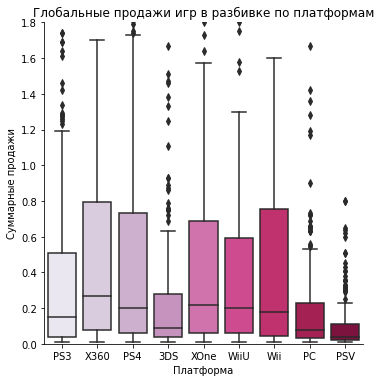

In [58]:
sns.catplot(x='platform',y='summary_sales',kind='box', data = act_data,palette='PuRd').set(ylim=(0,1.8))
plt.title('Глобальные продажи игр в разбивке по платформам')

plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show()

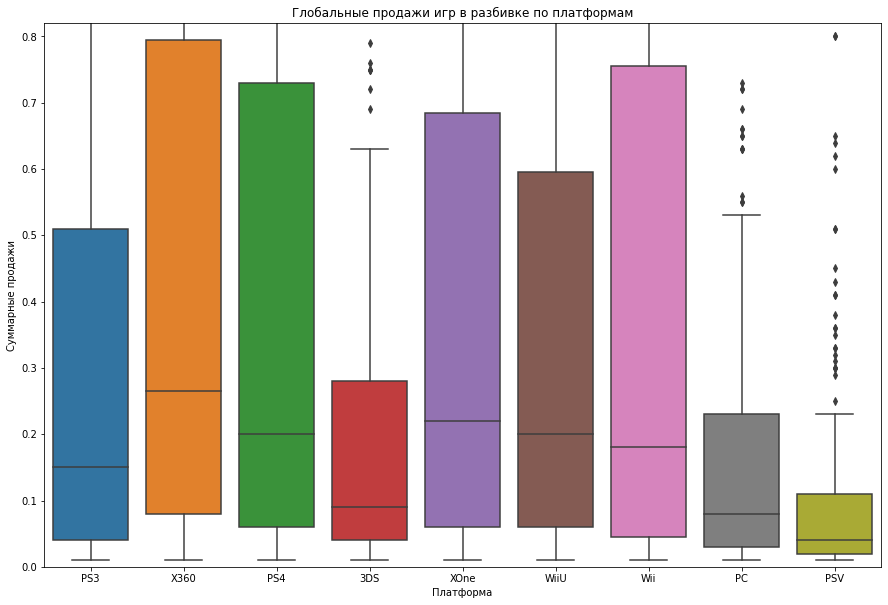

In [59]:
fig = plt.figure(figsize=(15, 10))
sns.boxplot(x='platform', y='summary_sales', data=act_data)
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.ylim(0,0.82)
plt.show()

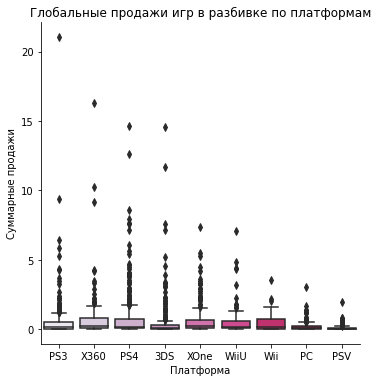

In [60]:

sns.catplot(x='platform',y='summary_sales',kind='box', data = act_data,palette='PuRd')
plt.title('Глобальные продажи игр в разбивке по платформам')

plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show()

По этим графикам можно сделать вывод, что платформы имеют большую разницу даже по выбросам, так как видно, что у компаний таких как PS3  PS4 3DS супер успешных проектов больше чем у тех же Wii PC PSV    
По графикам так же видно, что медианные продажи X360,XOne,PS4,Wii,WiiU выше чем у других платформ. Можно рекомендовать обратить внимание на эти платформы  
Наибольшее медианное значение - x360 
Наименьшее медианное значение - psv

In [61]:
data_popular_platf = act_data[act_data['platform']=='PS4']
data_popular_platf

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,summary_sales,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,M
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.58,82.0,4.3,E
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,7.98,NaN,NaN,NaN
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,7.66,83.0,5.7,M
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,0.01,69.0,7.5,NaN
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,0.01,61.0,7.9,T
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,0.01,51.0,5.5,M


In [62]:
data_pop_platf_wt_nan = data_popular_platf.dropna(subset=['critic_score'])
data_pop_platf_wt_nan

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,summary_sales,critic_score,user_score,rating
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,M
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.58,82.0,4.3,E
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,7.66,83.0,5.7,M
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,7.60,85.0,5.0,E
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,7.17,87.0,6.5,M
...,...,...,...,...,...,...,...,...,...,...,...,...
16486,Super Dungeon Bros,PS4,2016,Action,0.01,0.00,0.00,0.00,0.01,42.0,2.3,E10+
16499,Sherlock Holmes: The Devil's Daughter,PS4,2016,Adventure,0.01,0.00,0.00,0.00,0.01,70.0,6.8,T
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,0.01,69.0,7.5,NaN
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,0.01,61.0,7.9,T


In [63]:
corr, p_value = pearsonr(data_pop_platf_wt_nan['critic_score'], data_pop_platf_wt_nan['summary_sales'])
print(f"Коэффициент корреляции Пирсона: {corr:.2f}")

Коэффициент корреляции Пирсона: 0.41


Есть наличие слабой положительной линейной связи между critic_score и summary_sales. 

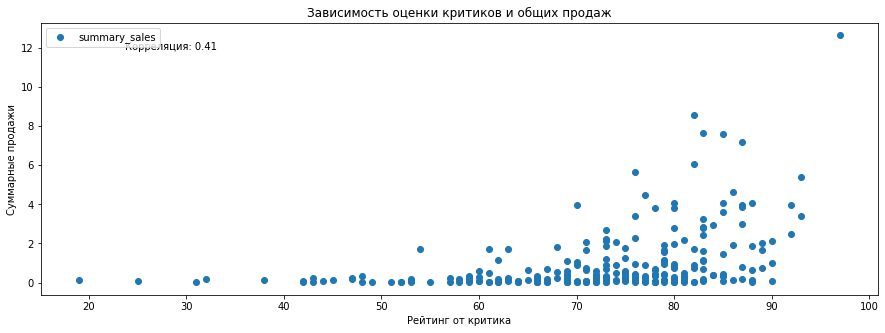

In [64]:
data_pop_platf_wt_nan.plot(y = 'summary_sales', x = 'critic_score', style='o',figsize=(15,5), title='Зависимость оценки критиков и общих продаж')
plt.text(x=0.1, y=0.9, s=f'Корреляция: {corr:.2f}', transform=plt.gca().transAxes)
plt.xlabel('Рейтинг от критика')
plt.ylabel('Суммарные продажи')
plt.show()

Есть наличие небольшой связи между оценкой критика и общими продажами, но понятно, что только от того как оценила некая группа людей, большинство вряд ли поменяет свое желаение купить игру, но хорошая оценка критиков может стать хорошей рекламой для игры  
Можно заметить, что игры которые пользовались особым успехом имели высокую оценку критиков

In [65]:
data_pop_plt_wt_nan_users = data_popular_platf.dropna(subset=['user_score'])
data_pop_plt_wt_nan_users = data_pop_plt_wt_nan_users[data_pop_plt_wt_nan_users['user_score']!=0]

In [66]:
corr, p_value = pearsonr(data_pop_plt_wt_nan_users['user_score'], data_pop_plt_wt_nan_users['summary_sales'])
print(f"Коэффициент корреляции Пирсона: {corr:.2f}")

Коэффициент корреляции Пирсона: -0.03


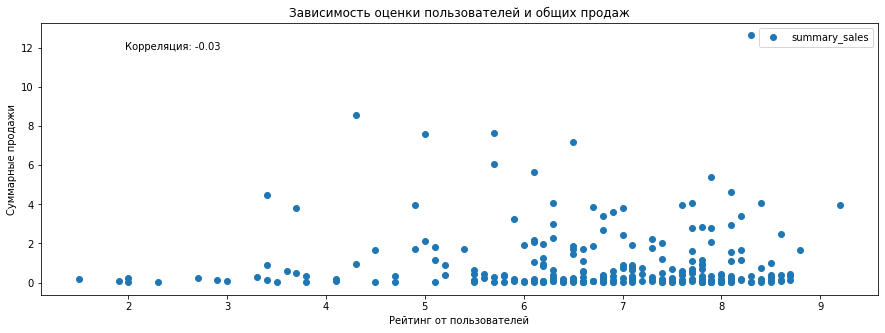

In [67]:
data_pop_plt_wt_nan_users.plot(y = 'summary_sales', x = 'user_score', style='o',figsize=(15,5), title='Зависимость оценки пользователей и общих продаж')
plt.text(x=0.1, y=0.9, s=f'Корреляция: {corr:.2f}', transform=plt.gca().transAxes)
plt.xlabel('Рейтинг от пользователей')
plt.ylabel('Суммарные продажи')
plt.show()

Линейной зависимости здесь нет. Можно заметить, что средние и хорошие оценки имеют некоторую зависимость с низкими-нормальными продажами, но наличие успешных проектов и с плохими оценками мешает сделать однозначный вывод о типе.  
Различные оценки игр могут иметь разный вес в принятии решения о покупке игры. Одни игроки могут ориентироваться на отзывы критиков, другие - на отзывы пользователей, третьи например - на рейтинг игры в определенном жанре. 

In [68]:
comp_act_data = act_data[['platform','summary_sales','critic_score','user_score']]
comp_act_data=comp_act_data.dropna(subset=['user_score'])
comp_act_data = comp_act_data[comp_act_data['user_score']!=0]
comp_act_data

,platform,summary_sales,critic_score,user_score
16,PS3,21.05,97.0,8.2
23,X360,16.27,97.0,8.1
42,PS4,12.62,97.0,8.3
60,X360,10.24,73.0,2.6
69,PS3,9.36,71.0,2.6
...,...,...,...,...
16643,XOne,0.01,NaN,6.6
16652,WiiU,0.01,81.0,8.5
16654,X360,0.01,NaN,5.1
16660,XOne,0.01,74.0,6.7


In [69]:
list_platforms = comp_act_data['platform'].unique().tolist()

In [70]:
print('Пользователи: ')
for i in list_platforms:
    comp_act_data_i = comp_act_data[comp_act_data['platform']==i]
    corr, p_value = pearsonr(comp_act_data_i['user_score'], comp_act_data_i['summary_sales'])
    print(f"Коэффициент корреляции Пирсона {i}: {corr:.2f}")

Пользователи: 
Коэффициент корреляции Пирсона PS3: 0.00
Коэффициент корреляции Пирсона X360: -0.01
Коэффициент корреляции Пирсона PS4: -0.03
Коэффициент корреляции Пирсона WiiU: 0.42
Коэффициент корреляции Пирсона XOne: -0.07
Коэффициент корреляции Пирсона 3DS: 0.24
Коэффициент корреляции Пирсона Wii: 0.68
Коэффициент корреляции Пирсона PC: -0.09
Коэффициент корреляции Пирсона PSV: 0.00


In [71]:
comp_act_data = act_data[['platform','summary_sales','critic_score','user_score']]
comp_act_data = comp_act_data.dropna(subset=['critic_score'])
comp_act_data

,platform,summary_sales,critic_score,user_score
16,PS3,21.05,97.0,8.2
23,X360,16.27,97.0,8.1
42,PS4,12.62,97.0,8.3
60,X360,10.24,73.0,2.6
69,PS3,9.36,71.0,2.6
...,...,...,...,...
16597,XOne,0.01,65.0,6.0
16630,XOne,0.01,63.0,8.2
16652,WiiU,0.01,81.0,8.5
16660,XOne,0.01,74.0,6.7


In [72]:
print('Критики: ')
for i in list_platforms:
    comp_act_data_i = comp_act_data[comp_act_data['platform']==i]
    try:
        corr, p_value = pearsonr(comp_act_data_i['critic_score'], comp_act_data_i['summary_sales'])
        print(f"Коэффициент корреляции Пирсона {i}: {corr:.2f}")
    except:
        print('Слишком мало данных')
    

Критики: 
Коэффициент корреляции Пирсона PS3: 0.33
Коэффициент корреляции Пирсона X360: 0.35
Коэффициент корреляции Пирсона PS4: 0.41
Коэффициент корреляции Пирсона WiiU: 0.38
Коэффициент корреляции Пирсона XOne: 0.42
Коэффициент корреляции Пирсона 3DS: 0.36
Слишком мало данных
Коэффициент корреляции Пирсона PC: 0.20
Коэффициент корреляции Пирсона PSV: 0.25


При анализе  корреляции по актуальным платформам можно заметить, что общая картина напоминает корреляцию по платформе PS4, за исключением:  
Коэффициент корреляции Пирсона WiiU: 0.42
Коэффициент корреляции Пирсона Wii: 0.68  
Которые говорят нам о умеренной линейной зависимости  (по пользователям)

У платформы Wii нет оценок критиков  

### Pаспределение игр по жанрам

In [73]:
genre_sale_sum = act_data.groupby('genre')['summary_sales'].agg(['sum','median','count'])
genre_sale_sum

,sum,median,count
genre,,,
Action,320.51,0.110,752
Adventure,22.90,0.030,211
Fighting,35.29,0.130,79
Misc,62.57,0.115,146
Platform,41.94,0.225,72
Puzzle,3.17,0.060,17
Racing,39.89,0.120,85
Role-Playing,144.86,0.120,285
Shooter,232.98,0.450,187


In [74]:
genre_sale_sum = act_data.groupby('genre')['summary_sales'].sum().reset_index().sort_values(by='summary_sales',ascending=False)

In [75]:
genre_sale_sum

,genre,summary_sales
0,Action,320.51
8,Shooter,232.98
10,Sports,149.93
7,Role-Playing,144.86
3,Misc,62.57
4,Platform,41.94
6,Racing,39.89
2,Fighting,35.29
1,Adventure,22.90
9,Simulation,21.55


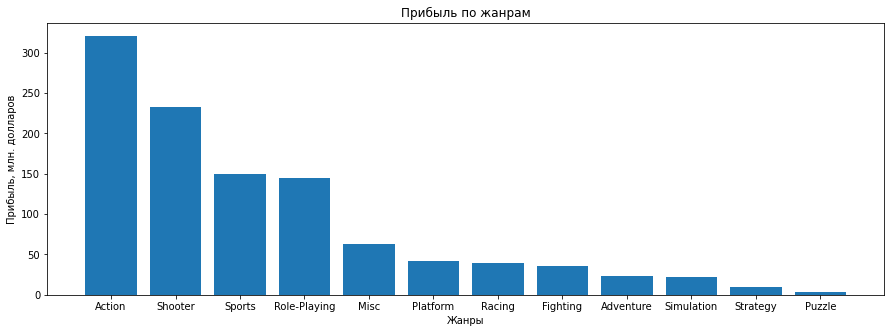

In [76]:
fig = plt.figure(figsize=(15, 5))
plt.bar(genre_sale_sum['genre'], genre_sale_sum['summary_sales'])
plt.title('Прибыль по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Прибыль, млн. долларов')
plt.show()

In [77]:
genre_sale_median = act_data.groupby('genre')['summary_sales'].median().reset_index().sort_values(
    by='summary_sales',
    ascending=False
)


In [78]:
genre_sale_median

,genre,summary_sales
8,Shooter,0.450
10,Sports,0.250
4,Platform,0.225
2,Fighting,0.130
7,Role-Playing,0.120
6,Racing,0.120
3,Misc,0.115
0,Action,0.110
9,Simulation,0.100
11,Strategy,0.080


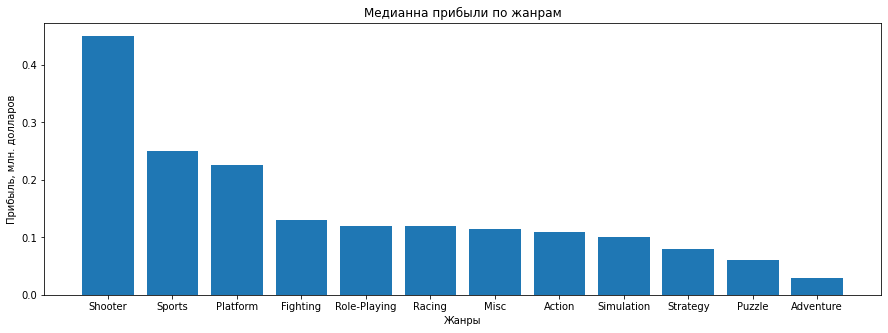

In [79]:
fig = plt.figure(figsize=(15, 5))
plt.bar(genre_sale_median['genre'], genre_sale_median['summary_sales'])
plt.title('Медианна прибыли по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Прибыль, млн. долларов')
plt.show()

По таблице прибыли видно, что наибольшую прибыль индустрии приносят action - 320 млн и shooter - 232 млн, так же довольно неплохие показатели у sports - 149 млн и role-playing - 144.86 млн аутсайдером же оказалcя : Puzzle - 3.17 млн   
По таблице медианы  видно, что наибольшая медина с отрывом от 2ого места почти в 2 раза -   shooter - 0.450 млн, второе же место - Sports - 0.250 млн аутсайдер :  Adventure - 0.030 млн, хотя количество игр большое.  
Если искать зависимость от количества то явно выделяется жанр - Shooter, так как при относительно небольшом количестве находится как по медиане так и по сумме на топ 1 и топ 2 позициях  

Определите для пользователя каждого региона (NA, EU, JP):  
Самые популярные платформы (топ-5). Опишите различия в долях продаж.  
Самые популярные жанры (топ-5). Поясните разницу.  
Влияет ли рейтинг ESRB на продажи в отдельном регионе?  

In [80]:
act_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,summary_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05,97.0,8.2,M
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97.0,8.1,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.60,NaN,NaN,NaN
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,M


In [81]:
platform_sales = act_data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

In [82]:
top_platforms_na = platform_sales.sort_values('na_sales', ascending=False)['na_sales'].reset_index()
top_platforms_eu = platform_sales.sort_values('eu_sales', ascending=False)['eu_sales'].reset_index()
top_platforms_jp = platform_sales.sort_values('jp_sales', ascending=False)['jp_sales'].reset_index()

In [83]:
top_platforms_na.head(5)

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20


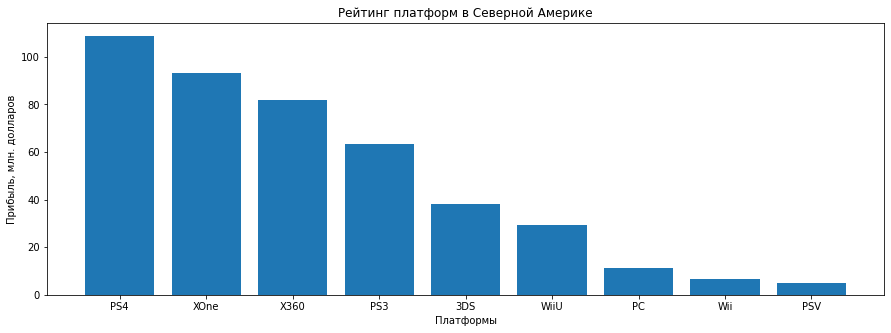

In [84]:
fig = plt.figure(figsize=(15, 5))
plt.bar(top_platforms_na['platform'], top_platforms_na['na_sales'])
plt.title('Рейтинг платформ в Северной Америке')
plt.xlabel('Платформы')
plt.ylabel('Прибыль, млн. долларов')
plt.show()

In [85]:
top_platforms_eu.head(5)

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96


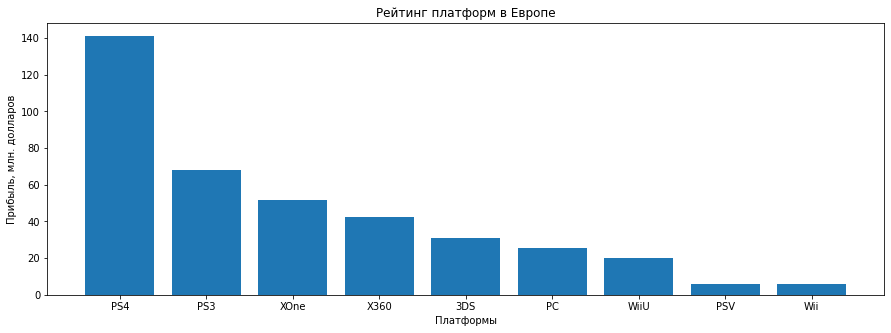

In [86]:
fig = plt.figure(figsize=(15, 5))
plt.bar(top_platforms_eu['platform'], top_platforms_eu['eu_sales'])
plt.title('Рейтинг платформ в Европе')
plt.xlabel('Платформы')
plt.ylabel('Прибыль, млн. долларов')
plt.show()

In [87]:
top_platforms_jp.head(5)

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88


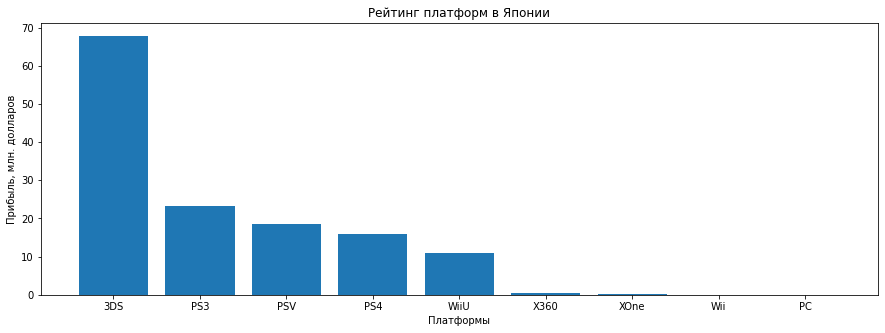

In [88]:
fig = plt.figure(figsize=(15, 5))
plt.bar(top_platforms_jp['platform'], top_platforms_jp['jp_sales'])
plt.title('Рейтинг платформ в Японии')
plt.xlabel('Платформы')
plt.ylabel('Прибыль, млн. долларов')
plt.show()

Япония : здесь с большим отрывом лидирует 3DS 68 млн, но PS3, PSV, PS4, WiiU  так же занимают хорошие позиции, весь этот список это японские производителя, а учитывая, как японцы уважают собственных производителей, то понятно почему такое преобладание над зарубежными Х360 и ХOne. В отличии от других регионов популярна PSV 
Северная Америка : Здесь компании  Sony и Microsoft идут почти в ровень по объемам прибыли, так как у обоих очень качественные продукты со своими эксклюзивными играми и это единственная старана где microsoft не отстает, связано скорее с тем, что компания американская . 
Европа : Преобладание PS4 в более чем 2 раза над своим прямым конкурентом - XOne

### Портрет пользователя каждого региона

In [89]:
genre_sales = act_data.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
top_genres_na = genre_sales.sort_values('na_sales', ascending=False)['na_sales'].reset_index()
top_genres_eu = genre_sales.sort_values('eu_sales', ascending=False)['eu_sales'].reset_index()
top_genres_jp =  genre_sales.sort_values('jp_sales', ascending=False)['jp_sales'].reset_index()

In [90]:
top_genres_na.head()

,genre,na_sales
0,Action,125.83
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.46


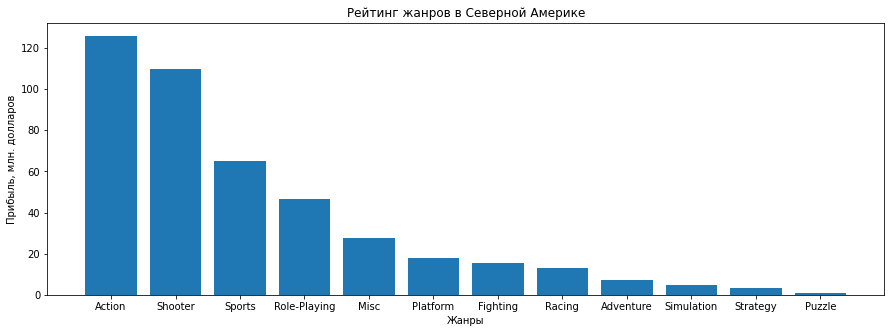

In [91]:
fig = plt.figure(figsize=(15, 5))
plt.bar(top_genres_na['genre'], top_genres_na['na_sales'])
plt.title('Рейтинг жанров в Северной Америке')
plt.xlabel('Жанры')
plt.ylabel('Прибыль, млн. долларов')
plt.show()

In [92]:
top_genres_eu.head()

,genre,eu_sales
0,Action,117.87
1,Shooter,87.86
2,Sports,60.34
3,Role-Playing,36.97
4,Racing,20.19


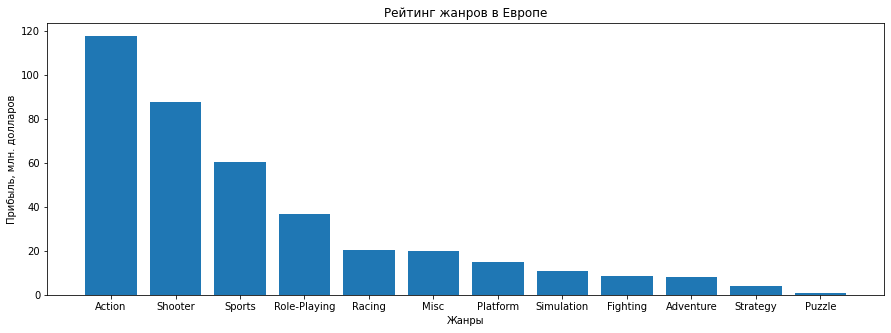

In [93]:
fig = plt.figure(figsize=(15, 5))
plt.bar(top_genres_eu['genre'], top_genres_eu['eu_sales'])
plt.title('Рейтинг жанров в Европе')
plt.xlabel('Жанры')
plt.ylabel('Прибыль, млн. долларов')
plt.show()

In [94]:
top_genres_jp.head()

,genre,jp_sales
0,Role-Playing,50.01
1,Action,39.65
2,Misc,9.03
3,Fighting,7.63
4,Shooter,6.61


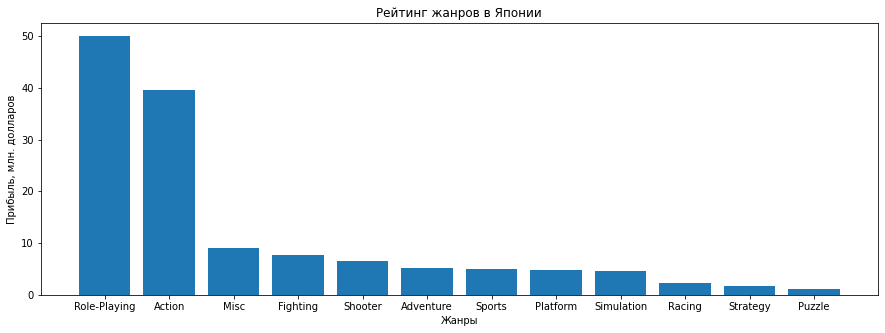

In [95]:
fig = plt.figure(figsize=(15, 5))
plt.bar(top_genres_jp['genre'], top_genres_jp['jp_sales'])
plt.title('Рейтинг жанров в Японии')
plt.xlabel('Жанры')
plt.ylabel('Прибыль, млн. долларов')
plt.show()

Европа и Северная Америка : рейтинги у них почти одинаковые, преобладают Action -120 млн Shooter - 90 млн отстают Adventure  Strategy Puzzle  
Япония : Первое место у Role-playing - 50.01 это объясняется тем, что данная тематика очень равзита там, но редко когда выходит перевод, та к как у данного жанра зачастую бюджет ограничен и близко по кол-ву прибыли - Action -39.65 . В аутсайдерах так же Strategy и  Puzzle  

In [96]:

act_data.loc[:, 'rating'] = act_data['rating'].fillna('0')

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [97]:
rating_sales = act_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
top_rating_na = rating_sales.sort_values('na_sales', ascending=False)['na_sales'].reset_index()
top_rating_eu = rating_sales.sort_values('eu_sales', ascending=False)['eu_sales'].reset_index()
top_rating_jp =  rating_sales.sort_values('jp_sales', ascending=False)['jp_sales'].reset_index()

In [98]:
act_data['rating'].value_counts(dropna=False)

0       911
M       369
T       332
E       296
E10+    250
Name: rating, dtype: int64

In [99]:
top_rating_na.head()

,rating,na_sales
0,M,165.21
1,0,89.18
2,E,78.94
3,E10+,54.02
4,T,49.79


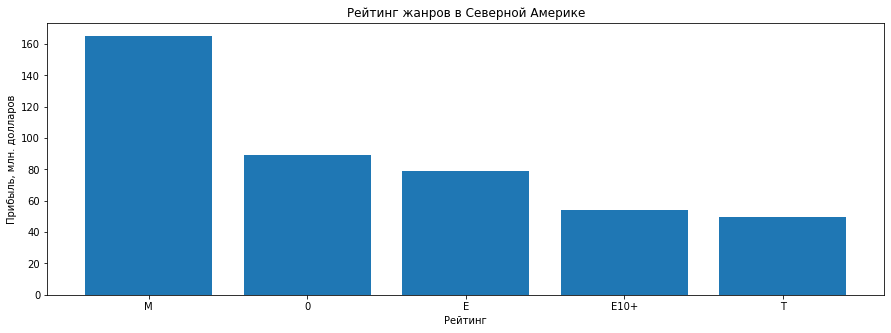

In [100]:
fig = plt.figure(figsize=(15, 5))
plt.bar(top_rating_na['rating'], top_rating_na['na_sales'])
plt.title('Рейтинг жанров в Северной Америке')
plt.xlabel('Рейтинг')
plt.ylabel('Прибыль, млн. долларов')
plt.show()

In [101]:
top_rating_eu.head()

,rating,eu_sales
0,M,145.32
1,E,82.80
2,0,78.61
3,E10+,42.53
4,T,41.95


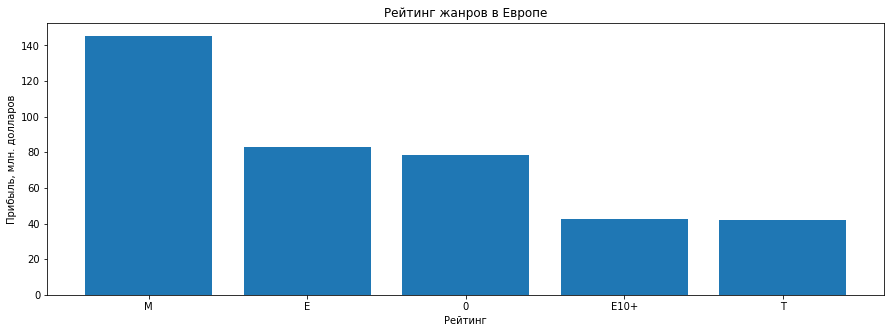

In [102]:
fig = plt.figure(figsize=(15, 5))
plt.bar(top_rating_eu['rating'], top_rating_eu['eu_sales'])
plt.title('Рейтинг жанров в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Прибыль, млн. долларов')
plt.show()

In [103]:
top_rating_jp.head()

,rating,jp_sales
0,0,82.05
1,T,20.44
2,E,15.00
3,M,14.11
4,E10+,5.89


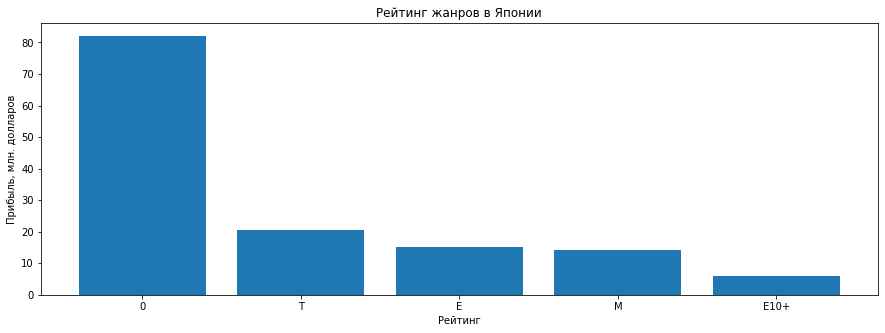

In [104]:
fig = plt.figure(figsize=(15, 5))
plt.bar(top_rating_jp['rating'], top_rating_jp['jp_sales'])
plt.title('Рейтинг жанров в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Прибыль, млн. долларов')
plt.show()

В Японии большинство проданных игр не имеют рейтинга, что может указывать на то, что в этой стране возрастной рейтинг не важен для пользователей, а так же у них есть свое рейтинговое агенство, которое имеют значительно отличающуюся шкалу.
Продажи в Северной Америке и Европе довольно таки схожи достигают максимума при играх, имеющих рейтинг "М" - взрослый
Е10+ и Т пользуются наименьшим интересом 


### Вывод  
1)В период с 1980 по 1994 год количество игр было довольно низким, но начиная с 1995 года стало расти и достигло пика в 2008-2009 году с 1426 играми, после чего пошел спад но до сих пор уровень достаточно высокий  На основе этого данные до 1994 не важны    
1980-1994 количество игр было слишком низким, из-за этого эти данные были убраны из рассмотрения   

2)Компании с  продажами превышающими 720 млн - 'DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360'  
  
3)Игры обычно выпускаются на одной платформе в течение 10 лет, а пиковые продажи обычно приходятся на середину этого периода.   Следовательно, для наших прогнозов на 2017 год необходимо использовать актуальные данные, соответствующие текущим платформам, которые находятся в середине своего жизненного цикла.   

4)Платформы DS,PS2,PS последние года не выпускают игры.     

5)Важный период -  отрезок после спада т.е. 2013-2016, с компаниями которые до сих пор продают либо в этот отрезок имели продажи    
  
6)Наиболее перспективными являются те платформы, которые находятся в начале или середине своего жизненного цикла, их продажи будут наиболее высокими в ближайшем будущем. Согласно графику, в этот список входят PS4, XOne и 3DS. WiiU также может быть добавлен, хотя продажи на ней в 2016 году снизились по сравнению с 2015, но это может быть связано с неполнотой статистики продаж за 2016 год. На PS3, X360 и Wii продажи явно снижаются, и это также должно быть учтено

7)Платформы имеют большую разницу даже по выбросам, так как видно, что у компаний таких как PS3  PS4 3DS супер успешных проектов больше чем у тех же Wii PC PSV      
Медианные продажи X360,XOne,PS4,Wii,WiiU выше чем у других платформ.    
Наибольшее медианное значение - x360   
Наименьшее медианное значение - psv  
  
8)Есть наличие небольшой связи между оценкой критика и общими продажами, но понятно, что только от того как оценила некая группа людей, большинство вряд ли поменяет свое желаение купить игру, но хорошая оценка критиков может стать хорошей рекламой для игры     
9)Можно заметить, что игры которые пользовались особым успехом имели высокую оценку критиков  

10)Можно заметить, что средние и хорошие оценки стимулируют к покупке и  можно наблюдать прирост игр с низкими-нормальными продажами, но наличие успешных проектов и с плохими оценками мешает сделать однозначный вывод о линейной зависимости оценок и игр.    
Различные оценки игр могут иметь разный вес в принятии решения о покупке игры.  
  
Критики:   
Коэффициент корреляции Пирсона PS3: 0.33  
Коэффициент корреляции Пирсона X360: 0.35  
Коэффициент корреляции Пирсона PS4: 0.41  
Коэффициент корреляции Пирсона WiiU: 0.38  
Коэффициент корреляции Пирсона XOne: 0.42  
Коэффициент корреляции Пирсона 3DS: 0.36  
Коэффициент корреляции Пирсона PC: 0.20  
Коэффициент корреляции Пирсона PSV: 0.25  


Пользователи:   
Коэффициент корреляции Пирсона PS3: 0.00  
Коэффициент корреляции Пирсона X360: -0.01  
Коэффициент корреляции Пирсона PS4: -0.03   
Коэффициент корреляции Пирсона WiiU: 0.42  
Коэффициент корреляции Пирсона XOne: -0.07  
Коэффициент корреляции Пирсона 3DS: 0.24  
Коэффициент корреляции Пирсона Wii: 0.68  
Коэффициент корреляции Пирсона PC: -0.09  
Коэффициент корреляции Пирсона PSV: 0.00  

11)Наибольшую прибыль индустрии приносят action - 320 млн и shooter - 232 млн, так же довольно неплохие показатели у sports - 149 млн и role-playing - 144.86 млн аутсайдером же оказалcя : Puzzle - 3.17 млн     
Наибольшая медина с отрывом от 2ого места почти в 2 раза -   shooter - 0.450 млн, второе же место - Sports - 0.250 млн аутсайдер :  Adventure - 0.030 млн, хотя количество игр большое.    
Если искать зависимость от количества то явно выделяется жанр - Shooter, так как при относительно небольшом количестве находится как по медиане так и по сумме на топ 1 и топ 2 позициях    

12)Япония : здесь с большим отрывом лидирует 3DS 68 млн, но PS3, PSV, PS4, WiiU  так же занимают хорошие позиции, весь этот список это японские производители, а учитывая, как японцы уважают собственных производителей, то понятно почему такое преобладание над зарубежными Х360 и ХOne. В отличии от других регионов популярна PSV   
Северная Америка : Здесь компании  Sony и Microsoft идут почти в ровень по объемам прибыли, так как у обоих очень качественные продукты со своими эксклюзивными играми и это единственная старана где microsoft не отстает, связано скорее с тем, что компания американская .   
Европа : Преобладание PS4 в более чем 2 раза над своим прямым конкурентом - XOne  

13)Европа и Северная Америка : рейтинги у них почти одинаковые, преобладают Action -120 млн Shooter - 90 млн отстают Adventure Strategy Puzzle  
Япония : Первое место у Role-playing - 50.01 млн это объясняется тем, что данная тематика очень равзита там, но редко когда выходит перевод, та к как у данного жанра зачастую бюджет ограничен и близко по кол-ву прибыли - Action -39.65 . В аутсайдерах так же Strategy и Puzzle  

14)В Японии большинство проданных игр не имеют рейтинга, что может указывать на то, что в этой стране возрастной рейтинг не важен для пользователей Продажи в Северной Америке и Европе довольно таки схожи достигают максимума при играх, имеющих рейтинг "М" - взрослый  

## Статистический анализ. Проверка гипотез

H0 : Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
Ha : Средние пользовательские рейтинги платформ Xbox One и PC различаются 

In [105]:
data_xbox_one = act_data[act_data['platform']=='XOne']['user_score'].dropna()
data_xbox_one = data_xbox_one[data_xbox_one != 0]
data_pc = act_data[act_data['platform']=='PC']['user_score'].dropna()
data_pc = data_pc[data_pc !=0]

alpha = 0.05

result = st.ttest_ind(data_xbox_one,data_pc)

if result.pvalue < alpha:
    print(f'p_value = {result.pvalue:.2f} -> Нулевая гипотеза может быть отвергнута')
else:
    print(f'p_value = {result.pvalue:.2f} -> Нулевая гипотеза не может быть отвергнута')

p_value = 0.14 -> Нулевая гипотеза не может быть отвергнута


Используя данные об оценках пользователей платформ Xbox One и PC, проведен t-тест для проверки гипотезы о равенстве средних пользовательских рейтингов этих платформ   
  
Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
  
Альтернативная гипотеза - средние пользовательские рейтинги этих платформ различаются 
  
Уровень значимости alpha равен 0.05    
  
В результате t-теста получено значение p-value = 0.14 . Так как p-value больше чем альфа, то нулевую гипотезу отвергаем   

Можно сделать вывод, что средние пользовательские рейтинги платформ Xbox One и PC различаются    

In [106]:
print(f'Выборочное среднее для Xbox One || PC :  {data_xbox_one.mean()} || {data_pc.mean()}')

Выборочное среднее для Xbox One || PC :  6.521428571428572 || 6.2696774193548395


Обе оценки очень близки друг к другу 

H0 : Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.  
Ha : редние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различны.

In [107]:
data_actions = act_data[act_data['genre']=='Action']['user_score'].dropna()
data_actions = data_actions[data_actions!=0]
data_sports =  act_data[act_data['genre']=='Sports']['user_score'].dropna()
data_sports = data_sports[data_sports!=0]

alpha = 0.05

result = st.ttest_ind(data_actions,data_sports)

if result.pvalue < alpha:
    print(f'p_value = {result.pvalue:.2f} -> Нулевая гипотеза может быть отвергнута')
else:
    print(f'p_value = {result.pvalue:.2f} -> Нулевая гипотеза не может быть отвергнута')

p_value = 0.00 -> Нулевая гипотеза может быть отвергнута


In [108]:
print(f'Выборочное среднее для Xbox One || PC :  {data_actions.mean()} || {data_sports.mean()}')

Выборочное среднее для Xbox One || PC :  6.842783505154639 || 5.249685534591195


In [109]:
print(f'статистика разности : {result.statistic}')

статистика разности : 11.475280254127211


Учитывая результат полученный после t-теста и высокую статистику разности и отличающиеся средние, можем утверждать что гипотеза о различии точно не может быть отвергнута

## Итог

1)Есть столбцы с  стоблцы заполненные только на 60 % - User_Score и Rating  
2)Были удалены все nan в столбцах: genre, year_of_release, name  
3)В user_score tbd заменено на 0, которого в этом столбце больше нет, так как удалена еинственная строка которая его содержала, но данные не выглядили корректными  
4)Добавлен столбец с суммарными продажами  
5)Убрано 272 строки 
 
6)В период с 1980 по 1994 год количество игр было довольно низким, но начиная с 1995 года стало расти и достигло пика в 2008-2009 году с 1426 играми, после чего пошел спад но до сих пор уровень достаточно высокий На основе этого данные до 1994 не важны
1980-1994 количество игр было слишком низким, из-за этого эти данные были убраны из рассмотрения

7)Компании с продажами превышающими 720 млн - 'DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360'

8)Игры обычно выпускаются на одной платформе в течение 10 лет, а пиковые продажи обычно приходятся на середину этого периода. Следовательно, для наших прогнозов на 2017 год необходимо использовать актуальные данные, соответствующие текущим платформам, которые находятся в середине своего жизненного цикла.

9)Платформы DS,PS2,PS последние года не выпускают игры.

10)Важный период - отрезок после спада т.е. 2013-2016, с компаниями которые до сих пор продают либо в этот отрезок имели продажи

11)Наиболее перспективными являются те платформы, которые находятся в начале или середине своего жизненного цикла, их продажи будут наиболее высокими в ближайшем будущем. Согласно графику, в этот список входят PS4, XOne и 3DS. WiiU также может быть добавлен, хотя продажи на ней в 2016 году снизились по сравнению с 2015, но это может быть связано с неполнотой статистики продаж за 2016 год. На PS3, X360 и Wii продажи явно снижаются, и это также должно быть учтено

12)Платформы имеют большую разницу даже по выбросам, так как видно, что у компаний таких как PS3 PS4 3DS супер успешных проектов больше чем у тех же Wii PC PSV
Медианные продажи X360,XOne,PS4,Wii,WiiU выше чем у других платформ.
Наибольшее медианное значение - x360  
Наименьшее медианное значение - psv  

13)Есть наличие небольшой связи между оценкой критика и общими продажами, но понятно, что только от того как оценила некая группа людей, большинство вряд ли поменяет свое желаение купить игру, но хорошая оценка критиков может стать хорошей рекламой для игры  
14)Можно заметить, что игры которые пользовались особым успехом имели высокую оценку критиков  

15)Можно заметить, что средние и хорошие оценки стимулируют к покупке и можно наблюдать прирост игр с низкими-нормальными продажами, но наличие успешных проектов и с плохими оценками мешает сделать однозначный вывод о линейной зависимости оценок и игр.  
Различные оценки игр могут иметь разный вес в принятии решения о покупке игры.  

Критики:
Коэффициент корреляции Пирсона PS3: 0.33  
Коэффициент корреляции Пирсона X360: 0.35  
Коэффициент корреляции Пирсона PS4: 0.41  
Коэффициент корреляции Пирсона WiiU: 0.38  
Коэффициент корреляции Пирсона XOne: 0.42  
Коэффициент корреляции Пирсона 3DS: 0.36  
Коэффициент корреляции Пирсона PC: 0.20  
Коэффициент корреляции Пирсона PSV: 0.25  

Пользователи:
Коэффициент корреляции Пирсона PS3: 0.00  
Коэффициент корреляции Пирсона X360: -0.01  
Коэффициент корреляции Пирсона PS4: -0.03  
Коэффициент корреляции Пирсона WiiU: 0.42  
Коэффициент корреляции Пирсона XOne: -0.07  
Коэффициент корреляции Пирсона 3DS: 0.24  
Коэффициент корреляции Пирсона Wii: 0.68  
Коэффициент корреляции Пирсона PC: -0.09  
Коэффициент корреляции Пирсона PSV: 0.00  

16)Наибольшую прибыль индустрии приносят action - 320 млн и shooter - 232 млн, так же довольно неплохие показатели у sports - 149 млн и role-playing - 144.86 млн аутсайдером же оказалcя : Puzzle - 3.17 млн
Наибольшая медина с отрывом от 2ого места почти в 2 раза - shooter - 0.450 млн, второе же место - Sports - 0.250 млн аутсайдер : Adventure - 0.030 млн, хотя количество игр большое.
Если искать зависимость от количества то явно выделяется жанр - Shooter, так как при относительно небольшом количестве находится как по медиане так и по сумме на топ 1 и топ 2 позициях

17)Япония : здесь с большим отрывом лидирует 3DS 68 млн, но PS3, PSV, PS4, WiiU так же занимают хорошие позиции, весь этот список это японские производители, а учитывая, как японцы уважают собственных производителей, то понятно почему такое преобладание над зарубежными Х360 и ХOne. В отличии от других регионов популярна PSV
Северная Америка : Здесь компании Sony и Microsoft идут почти в ровень по объемам прибыли, так как у обоих очень качественные продукты со своими эксклюзивными играми и это единственная старана где microsoft не отстает, связано скорее с тем, что компания американская .
Европа : Преобладание PS4 в более чем 2 раза над своим прямым конкурентом - XOne

18)Европа и Северная Америка : рейтинги у них почти одинаковые, преобладают Action -120 млн Shooter - 90 млн отстают Adventure Strategy Puzzle
Япония : Первое место у Role-playing - 50.01 млн это объясняется тем, что данная тематика очень равзита там, но редко когда выходит перевод, та к как у данного жанра зачастую бюджет ограничен и близко по кол-ву прибыли - Action -39.65 . В аутсайдерах так же Strategy и Puzzle

19)В Японии большинство проданных игр не имеют рейтинга, что может указывать на то, что в этой стране возрастной рейтинг не важен для пользователей Продажи в Северной Америке и Европе довольно таки схожи достигают максимума при играх, имеющих рейтинг "М" - взрослый

20)Гипотеза о том что средние пользовательские рейтинги платформ Xbox One и PC одинаковые - не смогла быть опровергнута  
21)Гипотеза о средняя пользовательская оценка игр в жанрах Action и Sports - не смогла быть опровегнутой

## Итог рекомендаций 
1) Сосредоточиться на платформах, которые находятся в начале или середине своего жизненного цикла, таких как PS4, XOne и 3DS, чтобы увеличить продажи.    
2) Обратить внимание на жанры action и shooter и sports, которые приносят наибольшую прибыль    
3) В Северной Америке наиболее популярны игры с рейтингом E (Everyone) и M (Mature), поэтому следует учитывать это   
4) Японские платформы, такие как 3DS и PSV, не так популярны в  Северной Америке  
5) Нет прямого влияния оценок на продажи, так что лучше обратить свое внимание на другие факторы  
6) Интересы покупателей в Северной Америке и Европе схожи, в то время как в Японии много отличий     
    6.1) 3DS и PSV имеют большую популярность  
    6.2) заинтересованы в играх в жанре Role Playing и Action - локально для этого рынка Role Playing отличное решение  
    6.3) нет интереса к Шутерам   
7) Нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются  
8) Гипотеза о средней пользовательской оценка игр в жанрах Action и Sports - не смогла быть опровегнутой  

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>

Самое главное - нам, нашей компании "Стримчик"-то что делать? Мы не разработчики, мы не критики, мы обычные продавцы. Нам нужно спланировать рекламную компанию на 2017 год. На что мы должны ставку делать? На что в каждом из рассмотренных регионов? Конкретика нужна от тебя, как от аналитика. 

Другими словами, в нашем исследовании мы проанализировали игры «с разных точек зрения». Логично, что рекламный отдел от нас ждет на какие платформы (1-2 штуки, на большее у нас не хватит рекламного бюджета), с каким жанром, с каким рейтингом ESRB и в каком регионе рекламировать. Стоит ли обращать внимание на отзывы или нет. К финальному выводу вся эта информация у нас уже есть, надо просто акцентировать на какие игры тратить рекламный бюджет.</div>

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>

После исправления красных комментариев надо будет ещё раз пересмотреть выводы в этом финальном разделе, я уверен, что некоторые акценты сместятся и твой вывод поменяется.
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b>

Спасибо за качественный, детальный, структурированный финальный вывод! Отдельное спасибо – за **рекомендации аналитика**, которые должны помочь менеджменту компании «Стримчик» в определении потенциально выигрышных в 2017 году продуктов и проектов.
</div>


# Результат ревью:

Я отмечаю адекватный уровень твоей программистской подготовки. Ты используешь продвинутые концепции языка Python и библиотеки pandas. Это показывает твой уровень владения инструментами.

Ты умело применяешь графические библиотеки (matplotlib / seaborn), выбираешь для визуализации ровно те типы графиков, которые нужны. Очень хорошо, что оси на графиках (в большинстве графиков!) подписаны и сами они имеют понятные названия.

С комментированием никаких проблем нет. Твоих объяснений достаточно для понимания твоими коллегами хода мыслей. Ссылки из брифа проекта в нужных местах также помогают следовать за развитием событий и дают полную информацию касаемо того, что будет происходить в том или ином разделе проекта.

Твоему проекту неплохо было бы придать структуру, реализовать полнофункциональное оглавление, соответствующее всем шагам/этапам анализа, изложенным в брифе проекта (а это фактически ТЗ для тебя, как для аналитика).

Зелёным цветом я отметил и прокомментировал удачные и элегантные решения, на которые ты можешь опираться в будущих проектах.

Жёлтым цветом я выделил то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас.

Однако есть принципиальные моменты, которые не позволяют мне принять твой проект в его нынешнем состоянии:

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b> 

1. Небольшая вводная перед исследованием даст быстрое понимание о том, чему оно посвящено. Я настоятельно рекомендую тебе оформить введение и добавить цели и задачи проекта.

2. Одна из задач этого проекта (согласно брифа): 1. Объясните, почему заполнили пропуски определённым образом или почему не стали это делать, 2. Опишите причины, которые могли привести к пропускам 3. Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать. Нужен твой комментарий, касающийся природы пропусков в столбце с рейтингами, а именно, может ли быть какая-то связь с тем, что в столбце с рейтингами >40% пропусков и тем, что эти оценки (рейтинги) выставляет **именно Американское рейтинговое агентство**?

3. Чего точно сейчас в твоем проекте не хватает и отчего он однозначно бы выиграл - это наличие некоей структуры. Названия разделов, подразделов. Оглавление. Сейчас ничего этого нет, отчего и сложно следить за ходом твоей мысли, т.к. повествование идёт ровно, плавно и незаметно перетекая из одного логического блока проекта в другой

4. В реальных рабочих датасетах скорее всего не будет полных дубликатов, но вот неявные наверняка будут встречаться, соответственно с ними надо будет уметь работать. Попробуй найти неявные дубликаты (нужно использовать параметр subset). Ну а в нашем учебном проекте пробуй найти дубликаты для пары "Имя - Игровая консоль". Как их планируешь и планируешь ли обрабатывать?    
5. В разделе построения «ящика с усами» по глобальным продажам игр в разбивке по платформам необходимо построить график так, чтобы квартили соответствующих «ящиков» позволяли визуально сравнивать платформы между собой. **Все боксплоты** нужно построить на одном графике.
 
6. Формулировать, что коэффициент (линейной) корреляции (Пирсона) между 2 переменными (в нашем случае между "продажами" и "оценками") есть показатель **влияния оценок на количество продаж** - неверно.

7. Мы "потеряли" игры без рейтинга. Кроме игр с явными рейтингами (которые ты анализируешь) есть ещё около тысячи игр без рейтинга. Но продажи именно таких игр могут указать на ключевое различие в регионах.

8. Здесь, в финальном выводе требуется максимально подробно описать что ты предлагаешь сделать в 2017 году, для того, чтобы твоя компания победила конкурентов.</div>

Эти 8 моментов требуют твоего внимания. Комментарии по ним помечены красным цветом. 

Подводя итог: хорошая работа на самом-то деле, молодец! Есть несколько моментов к исправлению, но уверен, что они не вызовут у тебя сложностей. После доработки обязательно проверь комментарии и выводы. Их нужно будет скорректировать. Жду доработанную версию проекта на повторное ревью.